# Machine Learning 101

# Machine Learning as Function Approximation

X... vectorial description of the object you want to make predictions for.

y... target value; numeric (regression), mutually exclusive class-label (classification).

h... hypothesis (aka model); function that maps from X to y.

Goal: find h from *example* pairs of (X, y).

Populating the interactive namespace from numpy and matplotlib


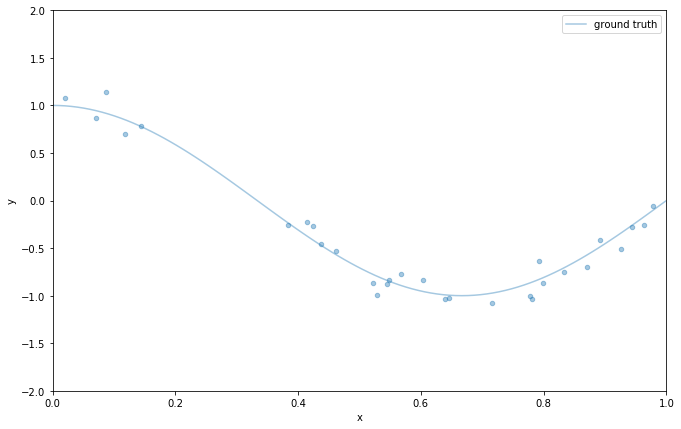

In [2]:
%pylab inline
import utils
X, y = utils.generate_curve_data()
fig = utils.plot_data(X, y, fn=utils.true_fn)

# Curve fitting

Can we recover the grund truth: `f(x) = cos(1.5 * pi * x)` from just the datapoints? 

Hypothesis class: straight line, `h(x) = slope * x + intercept`

In [ ]:
X, y = utils.generate_curve_data()
fig = utils.plot_data(X, y, fn=utils.true_fn)
x_plot = np.linspace(0, 1, 100)
plt.plot(x_plot, (x_plot * 0.0 ) + 0.0, label='A')
plt.plot(x_plot, (x_plot * -3.5 ) + 1.25, label='B')
plt.plot(x_plot, (x_plot * 1.75 ) - 2.0, label='C')
plt.legend()

# Model Selection

Which of the lines `A`, `B`, or `C` is the best model?

Different *inductive principles* can help us here:
  * Empirical Risk Minimization
  * Structural Risk Minimization
  * ...

# Curve fitting with scikit-learn

```python
class Estimator(BaseEstimator):
    
    def __init__(self, a_hyper_parameter=0):
        """Constructor sets the estimators hyper-parameters. 
        
        Parameters
        ----------
        a_hyper_parameter : int
            A parameter that controls how the estimator is fit.
        """
        self.a_hyper_parameter = a_hyper_parameter
  
    def fit(self, X, y=None):
        """Fits estimator's parameters (mind the underscore) from X and y. """
        # set state of ``self``
        self.state_ = None
        return self
            
    def predict(self, X):
        """Predict response of ``X``. """
        # compute predictions ``pred``
        return pred
```


In [ ]:
from sklearn.linear_model import LinearRegression

help(LinearRegression)

In [ ]:
est = LinearRegression()
est.fit(X[:, np.newaxis], y)

fig = utils.plot_data(X, y, fn=utils.true_fn, title='LinearRegression')
utils.plot_estimator(est, fig)

In [ ]:
est = utils.PolynomialRegression(degree=15)
est.fit(X[:, np.newaxis], y)

fig = utils.plot_data(X, y, fn=utils.true_fn, title='PolynomialRegression degree=15')
utils.plot_estimator(est, fig)

In [ ]:
est = utils.PolynomialRegression(degree=4)
est.fit(X[:, np.newaxis], y)

fig = utils.plot_data(X, y, fn=utils.true_fn, title='PolynomialRegression degree=4')
utils.plot_estimator(est, fig)

# ML as Search in Model Space

<img src="img/eslii-mdl-search.png">
<div style="text-align: right">Source: T. Hastie et al. (2017) "Elements of Statistical Learning (Ed. 2)"</div>

# Bias and Variance

<img src="img/fortmannroe-bias-var.png">
<div style="text-align: right">Source: Scott Fortmann-Roe (2012) "Understanding the Bias-Variance Tradeoff"</div>

# Bias and Variance - Error Decomposition

<img src="img/fortmannroe-bias-var-decomp.png">
<div style="text-align: right">Source: Scott Fortmann-Roe (2012) "Understanding the Bias-Variance Tradeoff"</div>

# Bias Variance Tradeoff

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fit degrees 1 to 20 on 25 random datasets, record train-test error
res = []
degrees = list(range(1, 20))
for degree in degrees:
    for rep in range(25):
        X, y = utils.generate_curve_data(n_samples=80, seed=rep)
        X_train, X_test, y_train, y_test = train_test_split(X[:, np.newaxis], y, test_size=.2, random_state=0)
        est = utils.PolynomialRegression(degree=degree).fit(X_train, y_train)
        res.append({'train_err': np.sqrt(mean_squared_error(y_train, est.predict(X_train))),
                    'test_err': np.sqrt(mean_squared_error(y_test, est.predict(X_test))),
                    'degree': degree,
                    'rep': rep})
        
err = pd.DataFrame(res)

In [ ]:
import seaborn as sns
sns.set()
_ = sns.lineplot(x='degree', y='train_err', data=err)
ax = sns.lineplot(x='degree', y='test_err', data=err)
_ = ax.set(xlabel='model complexity (degree)', ylabel='error (rmse)')